## 텐서 연산
심층 신경망이 학습한 모든 변환을 수치 데이터 센서에 적용하는 몇 종류의 텐서 연산(tensor operation; 또는 텐서 함수(tensor function)) 으로 나타낼 수 있다. 예를 들어 Dense 층을 쌓아 모델을 만들 때
```
keras.layer.Dense(512, activation = 'relu')
```
이 층을 구체적으로 보면 아래와 같습니다
```
output = relu(dot(W, input) + b)
(w는 행렬, b는 벡터)
(둘 모두 층의 속성)
```
여기에는 3개의 텐서 연산이 있다.
- 입력 텐서와 텐서 W 사이의 점곱(dot)
- 점곱으로 만들어진 행렬과 벡터 b 사이의 덧셈(+)
- relu(렐루) 연산, relu(x)는 max(x, 0)
<br><br>

```
(1, 2, 3) * (3, 2, 1) = (3, 4, 3) : np의 곱셈; element-wies
(1, 2, 3) · (3, 2, 1) = 10 : 내적; dot product
```

### 텐서 크기 변환
텐서의 크기를 변환한다는 것은 특정 크기의 맞게 열과 행을 재배열 하거나, 축을 추가하여 모양을 변환한다는 뜻이다. 당연히 크기가 변환되었을 뿐 원래의 텐서와 원소 개수가 동일.
<br><br>
axis = 0 : |<br>
axis = 1 : ----

In [2]:
import numpy as np
import pandas as pd

a = np.random.randint(1, 5, 6)
print(a.shape)

# 모양 변환하기 (축 추가하기)
print(a.reshape((6, 1)).shape)
print(a[:, np.newaxis].shape)
print(a[np.newaxis, :].shape)
print(np.expand_dims(a, axis = 0).shape)
print(np.expand_dims(a, axis = 1).shape)

(6,)
(6, 1)
(6, 1)
(1, 6)
(1, 6)
(6, 1)


In [3]:
a = a.reshape((2, 3))
a

array([[1, 1, 3],
       [4, 3, 3]])

In [4]:
print(a.shape)

# 위 a를 3차원으로 변환한다면?
print(a.reshape((1, 2, 3)).shape)
print(a[:, np.newaxis].shape)
print(a[np.newaxis, :].shape)
print(np.expand_dims(a, axis = 0).shape)
print(np.expand_dims(a, axis = 1).shape)
print(a[:, :, None].shape)

(2, 3)
(1, 2, 3)
(2, 1, 3)
(1, 2, 3)
(1, 2, 3)
(2, 1, 3)
(2, 3, 1)


In [5]:
# 전치
x = np.zeros((300, 20))
print('x.shape : \t\t', x.shape)
print('np.transpose(x).shape : ', np.transpose(x).shape)

x.shape : 		 (300, 20)
np.transpose(x).shape :  (20, 300)


### 텐서 곱셈
텐서곱셈(tensor product) 또는 점곱(dot product은 * 연산자를 사용하는 원소별 곱셈과 혼동하면 안된다. 넘파이에서 텐서 곱셈은 `np.dot` 함수를 사용하며 수행

In [6]:
a = np.random.random((32, ))
b = np.random.random((32, ))

print('[벡터] a * b : \n',  a * b)
print()
print('[스칼라] np.dot(a, b) : ', np.dot(a, b))

[벡터] a * b : 
 [0.03729493 0.00492692 0.65835799 0.23643708 0.34374595 0.05117872
 0.13694472 0.24721252 0.08288242 0.02943315 0.63458206 0.37018556
 0.00529033 0.00631533 0.12561051 0.26436767 0.20673473 0.22315699
 0.13426334 0.54659965 0.29364533 0.14401874 0.60520897 0.16349371
 0.08209029 0.60542652 0.09122031 0.49892406 0.01512647 0.09894834
 0.5765118  0.08236389]

[스칼라] np.dot(a, b) :  7.602498992679857


In [7]:
a = np.random.randint(-5, 5, 3)
b = np.random.randint(-5, 5, 3)

# out = relu(dot(W, input) + b)
np.maximum(0, (np.dot(a, b) * 2))

0

## 텐서 연산의 기하학(그래픽)적 해석
- 이동 : 한점에 벡터를 더하면 고정된 방향으로 고정된 양만큼 점을 이동
- 선형변환(linear transform) : 임의의 행렬과 점곱하면 선형 변환이 수행
- 아핀 변환(affine transform) : 선형 변환과 (벡터를 더해 얻는) 이동의 조합. 이는 Dense 층에서 수행되는 `y = W·b` 계산과 일치한다.
<br><br>
결국 활성화 함수 없이 Dense 층으로만 구성된 다층 신경망은 하나의 Dense 층과 다를 것이 없기 때문에, 이것이 relu 같은 활성화 함수가 필요한 이유가 되는 것이다. 활성화 함수 덕분에 Dense 층을 중첩하여 매우 복잡하고 비선형적인 기하학적 변형을 구현하면서 심층 신경망에 매우 풍부한 가설 공간을 제공할 수 있다는 것이다.

## 그래디언트 기반 최적화(신경망의 엔진)
```
output = relu(dot(W, input) + b
W : 가중치(weight); 커널(kernel)
b : 바이어스(bias); 훈련되는 파라미터(trainable parameter)
```
초기에는 가중치 행렬이 작은 난수로 채워져 있다 (무작위 초기화(random initialization) 단계라고 부름). 물론 W와 b 가 난수일때 위 식이 어떤 유용한 표현을 만들 것이라고 기대할 수는 없고 의미없는 표현이 만들어지겠지만, 이는 시작 단계일 뿐이고 점차 피드백 신호에 기초하여 가중치가 점진적으로 조정될 것. 이러한 점진적인 조정 혹은 훈련(training)이 머신 러닝 학습의 핵심이다.
<br><br>
훈련은 아래와 같은 훈련 반복 루프(training loop) 안에서 일어나는 데 손실이 충분히 낮아질 때까지 반복 루프 안에서 이러한 단계가 반복된다.
1. 훈련 샘플 x와 이에 상응하는 타깃 y_true의 배치를 추출한다
2. x를 사용하여 모델을 실행하고 (정방향 패스(forward pass) 단계), 예측 y_pred를 구한다
3. y_pred와 y_true의 차이를 측정하여 이 배치에 대한 모델의 손실을 계산
4. 배치에 대한 손실이 조금 감소되도록 모델의 모든 가중치를 업데이트

결국 훈련 데이터에서 모델의 손실, 즉 예측 y_pred와 타깃 y_true의 오차는 점차 매우 작아질 것이고, 입력에 정확한 타깃을 매핑할 수 있도록 학습하는 것이다. 어려운 부분은 모델의 가중치를 업데이트 하는 4번일 텐데, 개별적인 가중치 값이 증가해야할지 감소해야할지, 얼만큼 업데이트해야 할지는 어떻게 알 수 있을까?
<br><br>
모델의 가중치를 조금 변경하면 손실값이 예측 가능한 방향으로 조금 바뀌는데, 그레이디언트(gradient)라는 수학 연산을 사용하여 모델 가중치를 여러 방향으로 이동했을 때 손실이 얼마나 변하는지 설명할 수 있다. 이를 계산하면 손실이 감소하는 방향으로 가중치를, 그것도 한 번에 하나씩이 아니라 한번의 업데이트로 전체 가중치를 동시에 이동시킬 수 있다.


## 다양한 형태의 ReLU 함수
(11/18 일 기울기 소실 부분을 보변)<br>
relu는 Dying ReLU(= knockout) 문제가 발생할 수 있다고 했다. 미분했을 때 0 혹은 1의 값을 가진다는 건 어떤 레이어 하나에서 모든 노드의 미분 값이 0이 나온다면 이후 레이어에서는 어떤 값이 나오건 학습이 이루어지지 않는 문제인데. 이런 문제를 해결하고자 다양한 형태의 ReLU 함수들이 만들어졌다.

### Leaky ReLU
음수값들이 모두 0이 되는 것을 해결하기 위해 음수를 일부 반영해줄 수 있도록 만들어졌다. 기존의 relu 함수는 음수를 모두 0으로 만들어주었지만 Leaky ReLu는 음수에 0.01 을 곱해준다.
<br>
<br>
음수에 선형성이 생기게 되고, 그로인해 복잡한 분류에서 사용할 수 없다는 한계가 생겼다. 일부 사례에서는 Sigmoid 함수나 Tanh 함수보다도 성능이 떨어지는 경우도 있다. 만약 음수값이 아주 중요한 상황이라면 제한적으로 사용해보자

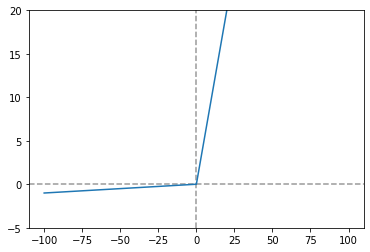

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def Leaky_ReLU(x) :
  return np.maximum(0.01 * x, x)

x = np.arange(-100, 100, 0.01)
y = Leaky_ReLU(x)

plt.ylim(-5, 20)

# 기준선 그려주기
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)

plt.plot(x, y)

### PReLU
Leaky relu와 거의 유사하지만 새로운 파라미터 α(알파)를 추가해 음수에서도 기울기를 학습한다. 즉, 하이퍼 파라미터로 내가 원하는 값을 줄 수 있도록 만든 활성화 함수
<br>
<br>
대규모 이미지 데이터셋에서는 relu 보다 성능이 좋다는 이야기가 있으나, 소규모 데이터셋에서는 과적합 될 위험이 있다. 또한, 역시나 선형성의 띄기 때문에 복잡한 분류에서는 주의해서 사용해야 한다.

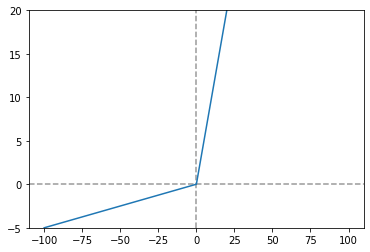

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def PReLU(x, a) :
  return np.maximum(a * x, x)

x = np.arange(-100, 100, 0.01)
y = PReLU(x, 0.05)

plt.ylim(-5, 20)

# 기준선 그려주기
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)

plt.plot(x, y)

### DLU
각져있는 relu를 exp를 사용해 부드럽게 만든것이다. relu의 모든 장점을 포함하여 Dying ReLU 문제를 해결했다. x가 0 이하일 때 f(x)값이 0이 아니라 음수값으로 부드럽게 이어지며 x가 음수에서 아무리 커져도 -1(α에 의해 조절 가능)의 일정한 음수값에 수렴하므로 노이즈에 덜 민감하다. x가 음수일 때도 기울기가 부드럽게 감소하며 x가 음수로 아무리 커져도 기울기는 0에 수렴하므로 역시 노이즈에 덜 민감하다
<br><br>
단, 지수 연산이 들어가기 때문에 연산에 비용이 발생한다.

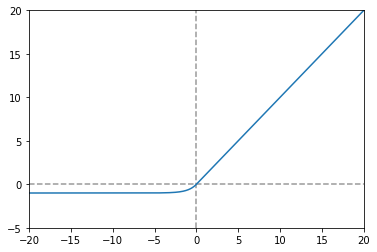

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def ELU(x, a=1) :
  return (x>0)*x + (x<=0)*(a*(np.exp(x) -1))

x = np.arange(-100, 100, 0.01)
a = 1
y = ELU(x, 1)

plt.ylim(-5, 20)
plt.xlim(-20, 20)

# 기준선 그려주기
plt.axvline(0.0, color='gray', linestyle='--', alpha=0.8)
plt.axhline(0.0, color='gray', linestyle='--', alpha=0.8)

plt.plot(x, y)

### Maxout
활성 함수를 구간 선형 함수(piecewise linear function)로 가정하고, 각 뉴런에 최적화된 활성함수를 학습을 통해 찾아낸다.
<br><br>
ReLU의 일반화된 형태라고 볼 수 있으며 성능이 뛰어나다.

<img src="https://user-images.githubusercontent.com/51469989/212820217-d17529d8-e93b-42a3-8cf1-317e97f87770.png" width="60%">

위 그림과 같이 뉴런별로 선형함수를 여러개 학습시킨 뒤 최대값을 취한 빨간 선을 취한다. maxout 을 사용해보고 싶다면 아래와 같이 하면된다
```python
# pip 설치
pip install tensorflow-addons

import tensorflow_addons as tfa

# 사용  예시
model = keras.Sequential([
    Dense(units=64, activation=tfa.layers.Maxout(64)),
    Dense(units=64, activation=tfa.layers.Maxout(64)),
    Dense(units=46, activation='softmax')
])
```